In [1]:
import numpy as np
import cv2
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation

from descriptor_index_pb2 import DescriptorIndex
from utils import plot_imgs
%load_ext autoreload
%autoreload 2

INDEX_ROOT = '../deep-relocalization/data/'
MAP_ROOT = '../deep-relocalization/maps/'

In [16]:
index = DescriptorIndex()
with open(Path(INDEX_ROOT, 'lindenhof_wet_aligned.pb').as_posix(), 'rb') as f:
    index.ParseFromString(f.read())

In [17]:
index.model_name, index.data_name, len(index.frames)

('resnet50_delf_vlad_triplets_margin-02_proj-40_sq',
 'lindenhof_afternoon-wet_aligned',
 1445)

In [18]:
pos = np.stack([f.position_vector.data for f in index.frames])
rot = np.stack([np.reshape(f.rotation_matrix.data, (3, 3), order='C') for f in index.frames])
descriptors = np.stack([f.global_descriptor.data for f in index.frames])
resources = np.stack([f.resource_name for f in index.frames])

<IPython.core.display.Javascript object>


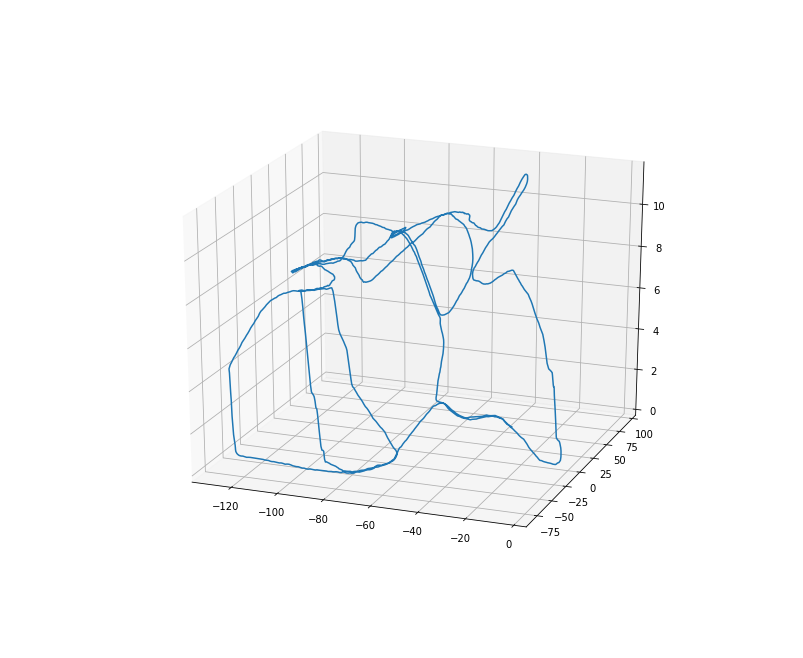

In [22]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(pos[:, 0], pos[:, 1], pos[:, 2])

In [23]:
im_root = Path(MAP_ROOT, index.data_name, 'resources/raw_images/')
step, _max = 3, 200
ims = [cv2.imread(Path(im_root, '%s.pgm' % index.frames[i].resource_name).as_posix()) for i in range(0, _max, step)]

<IPython.core.display.Javascript object>


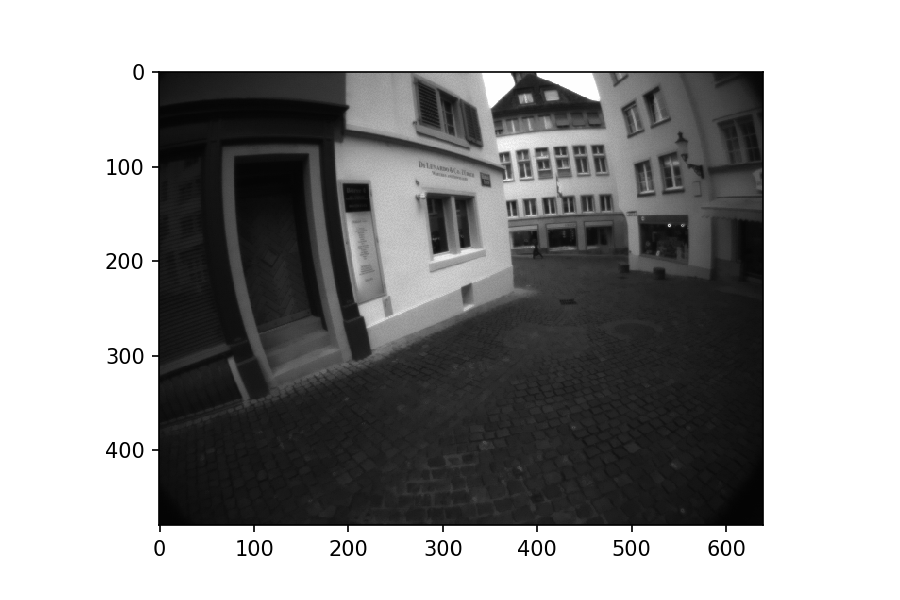

In [24]:
%matplotlib notebook
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
h = plt.imshow(ims[0])
def animate(i):
    h.set_data(ims[i])
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(ims), interval=700)

/home/psarlin/PLR/Deep-Relocalization/env/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


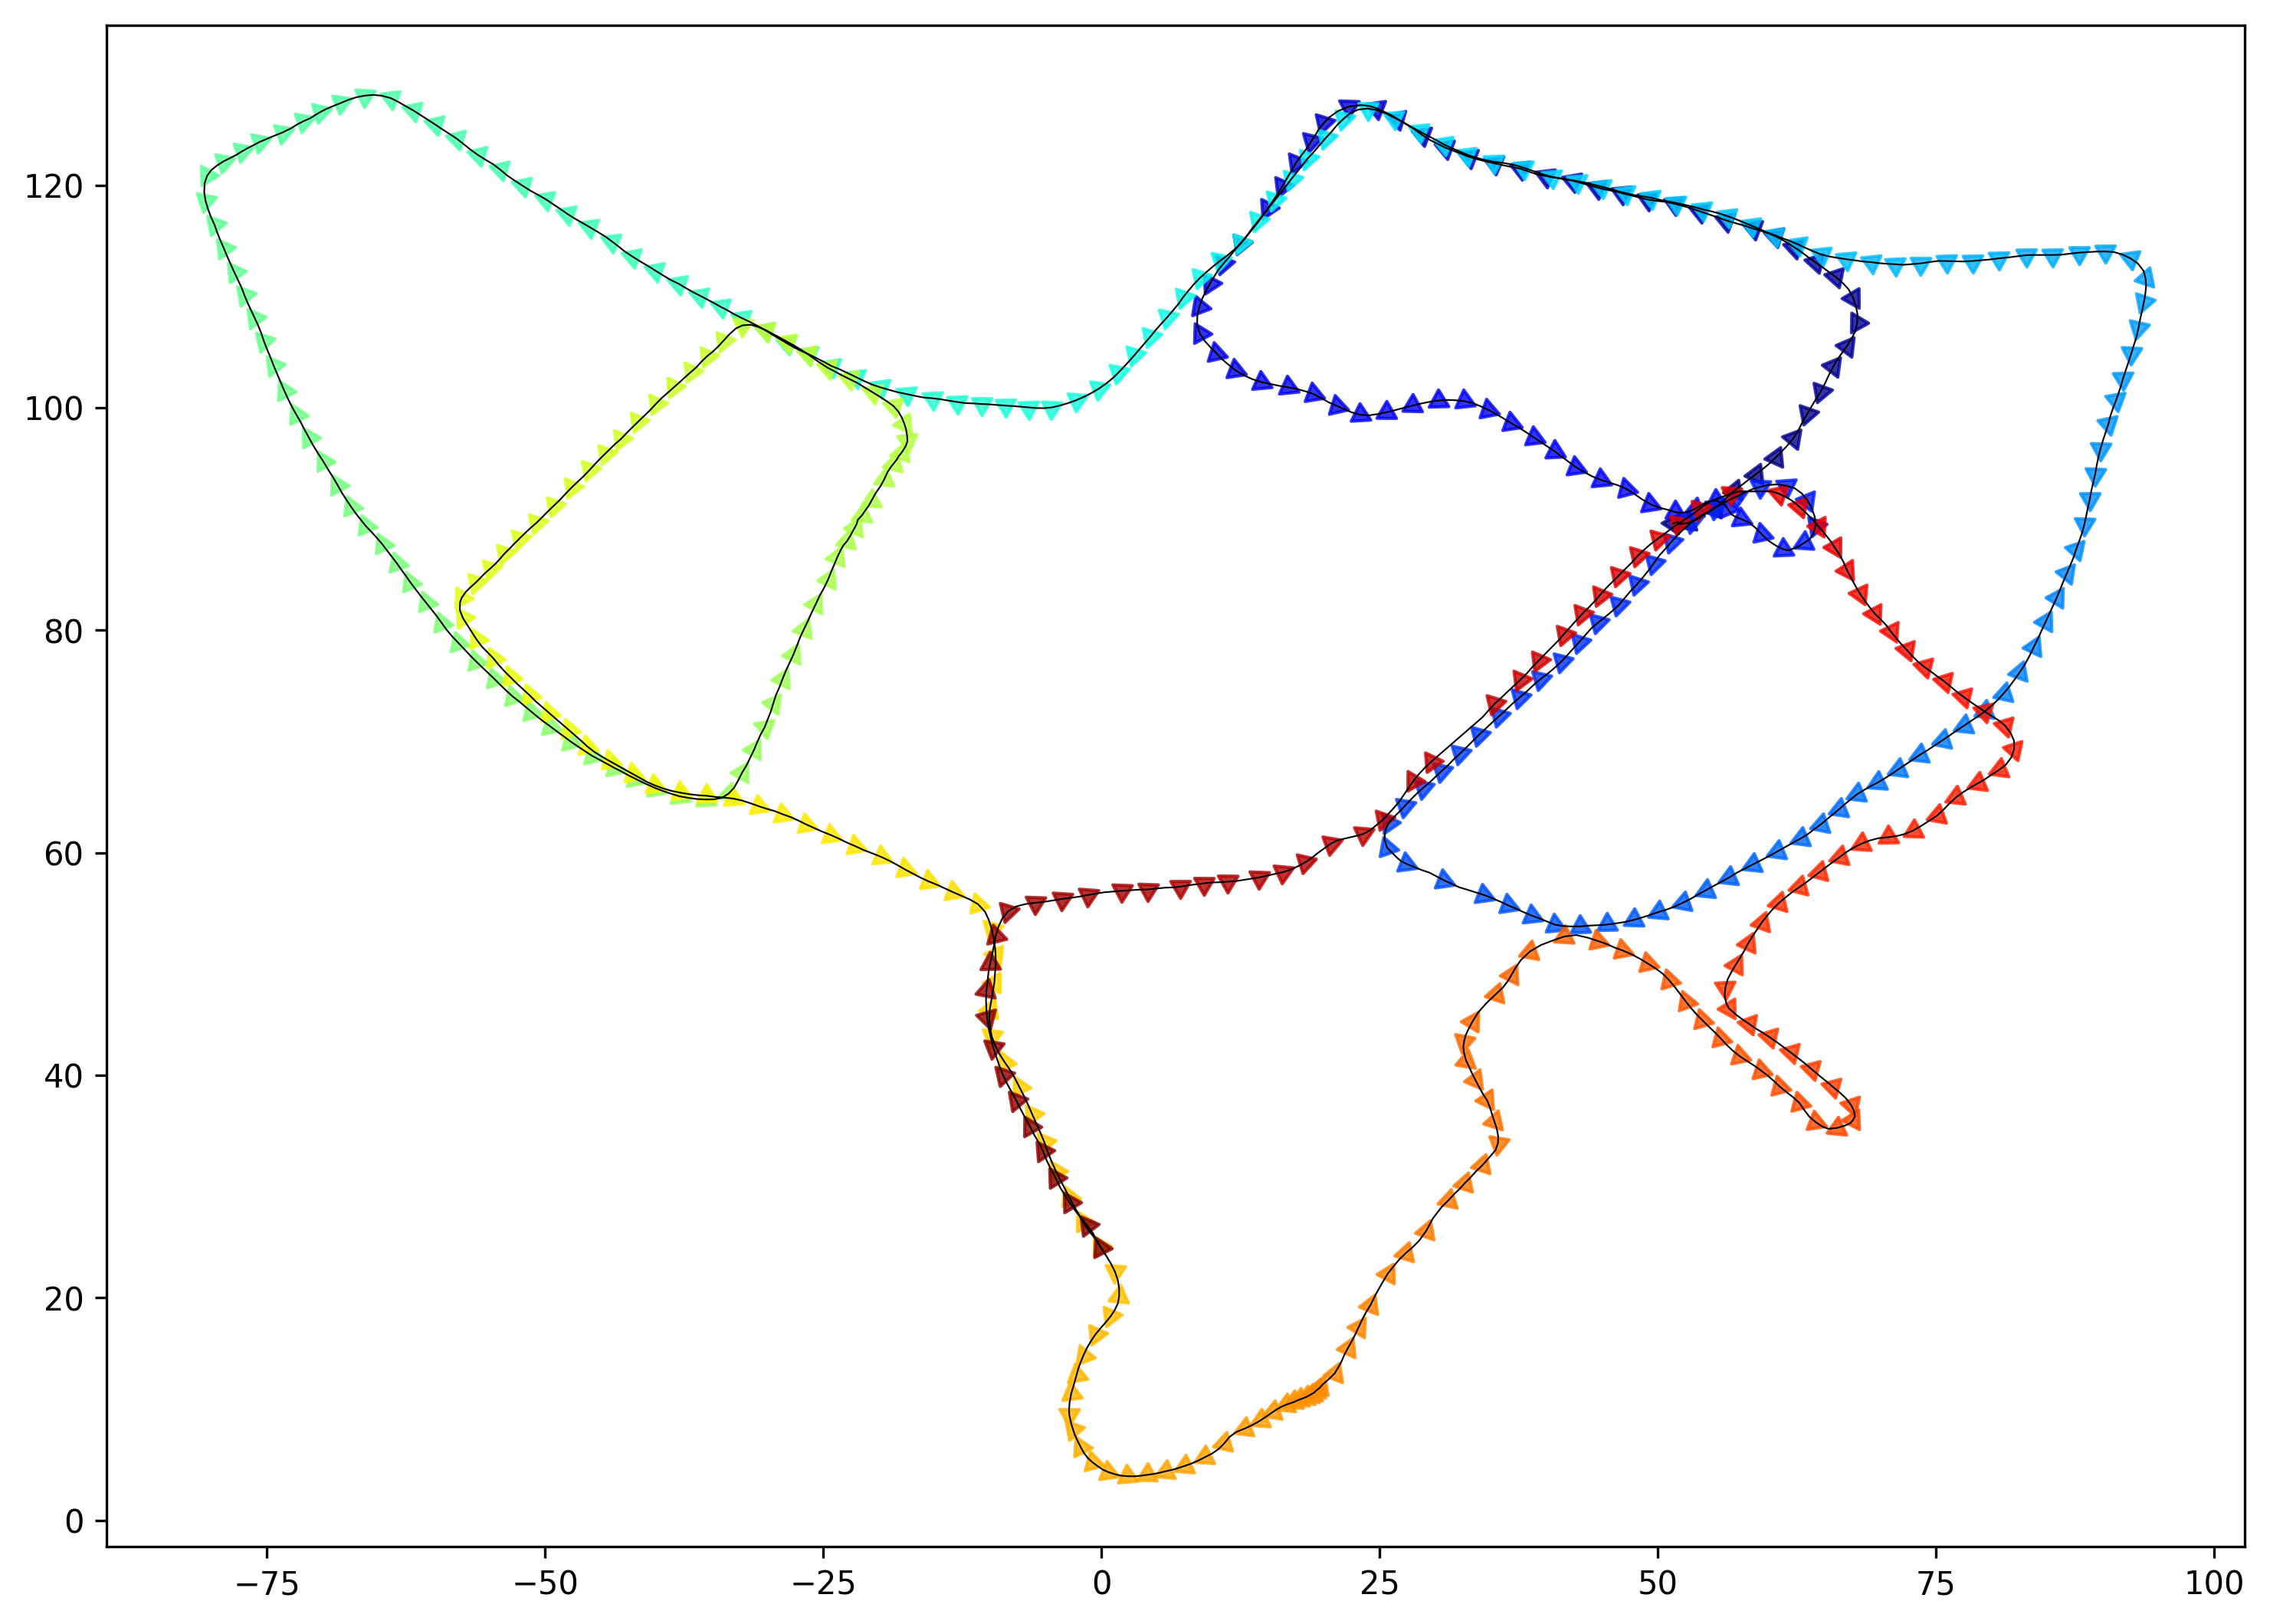

In [25]:
%matplotlib inline
plt.figure(figsize=(12, 12), dpi=300)
plt.plot(pos[:, 1], -pos[:, 0], linewidth=0.5, color='k');
plt.axes().set_aspect('equal')

indices = list(range(0, len(pos), 3))
angles = [np.arctan2(r[1, 0], r[0, 0]) for r in rot]
for idx in indices:
    plt.scatter(pos[idx, 1], -pos[idx, 0], linestyle='None', c=idx, cmap='jet', s=50,
                marker=(3, 1, 180*angles[idx]/np.pi-90), alpha=0.8,
                norm=plt.Normalize(vmin=0, vmax=indices[-1]));

/home/psarlin/PLR/Deep-Relocalization/env/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


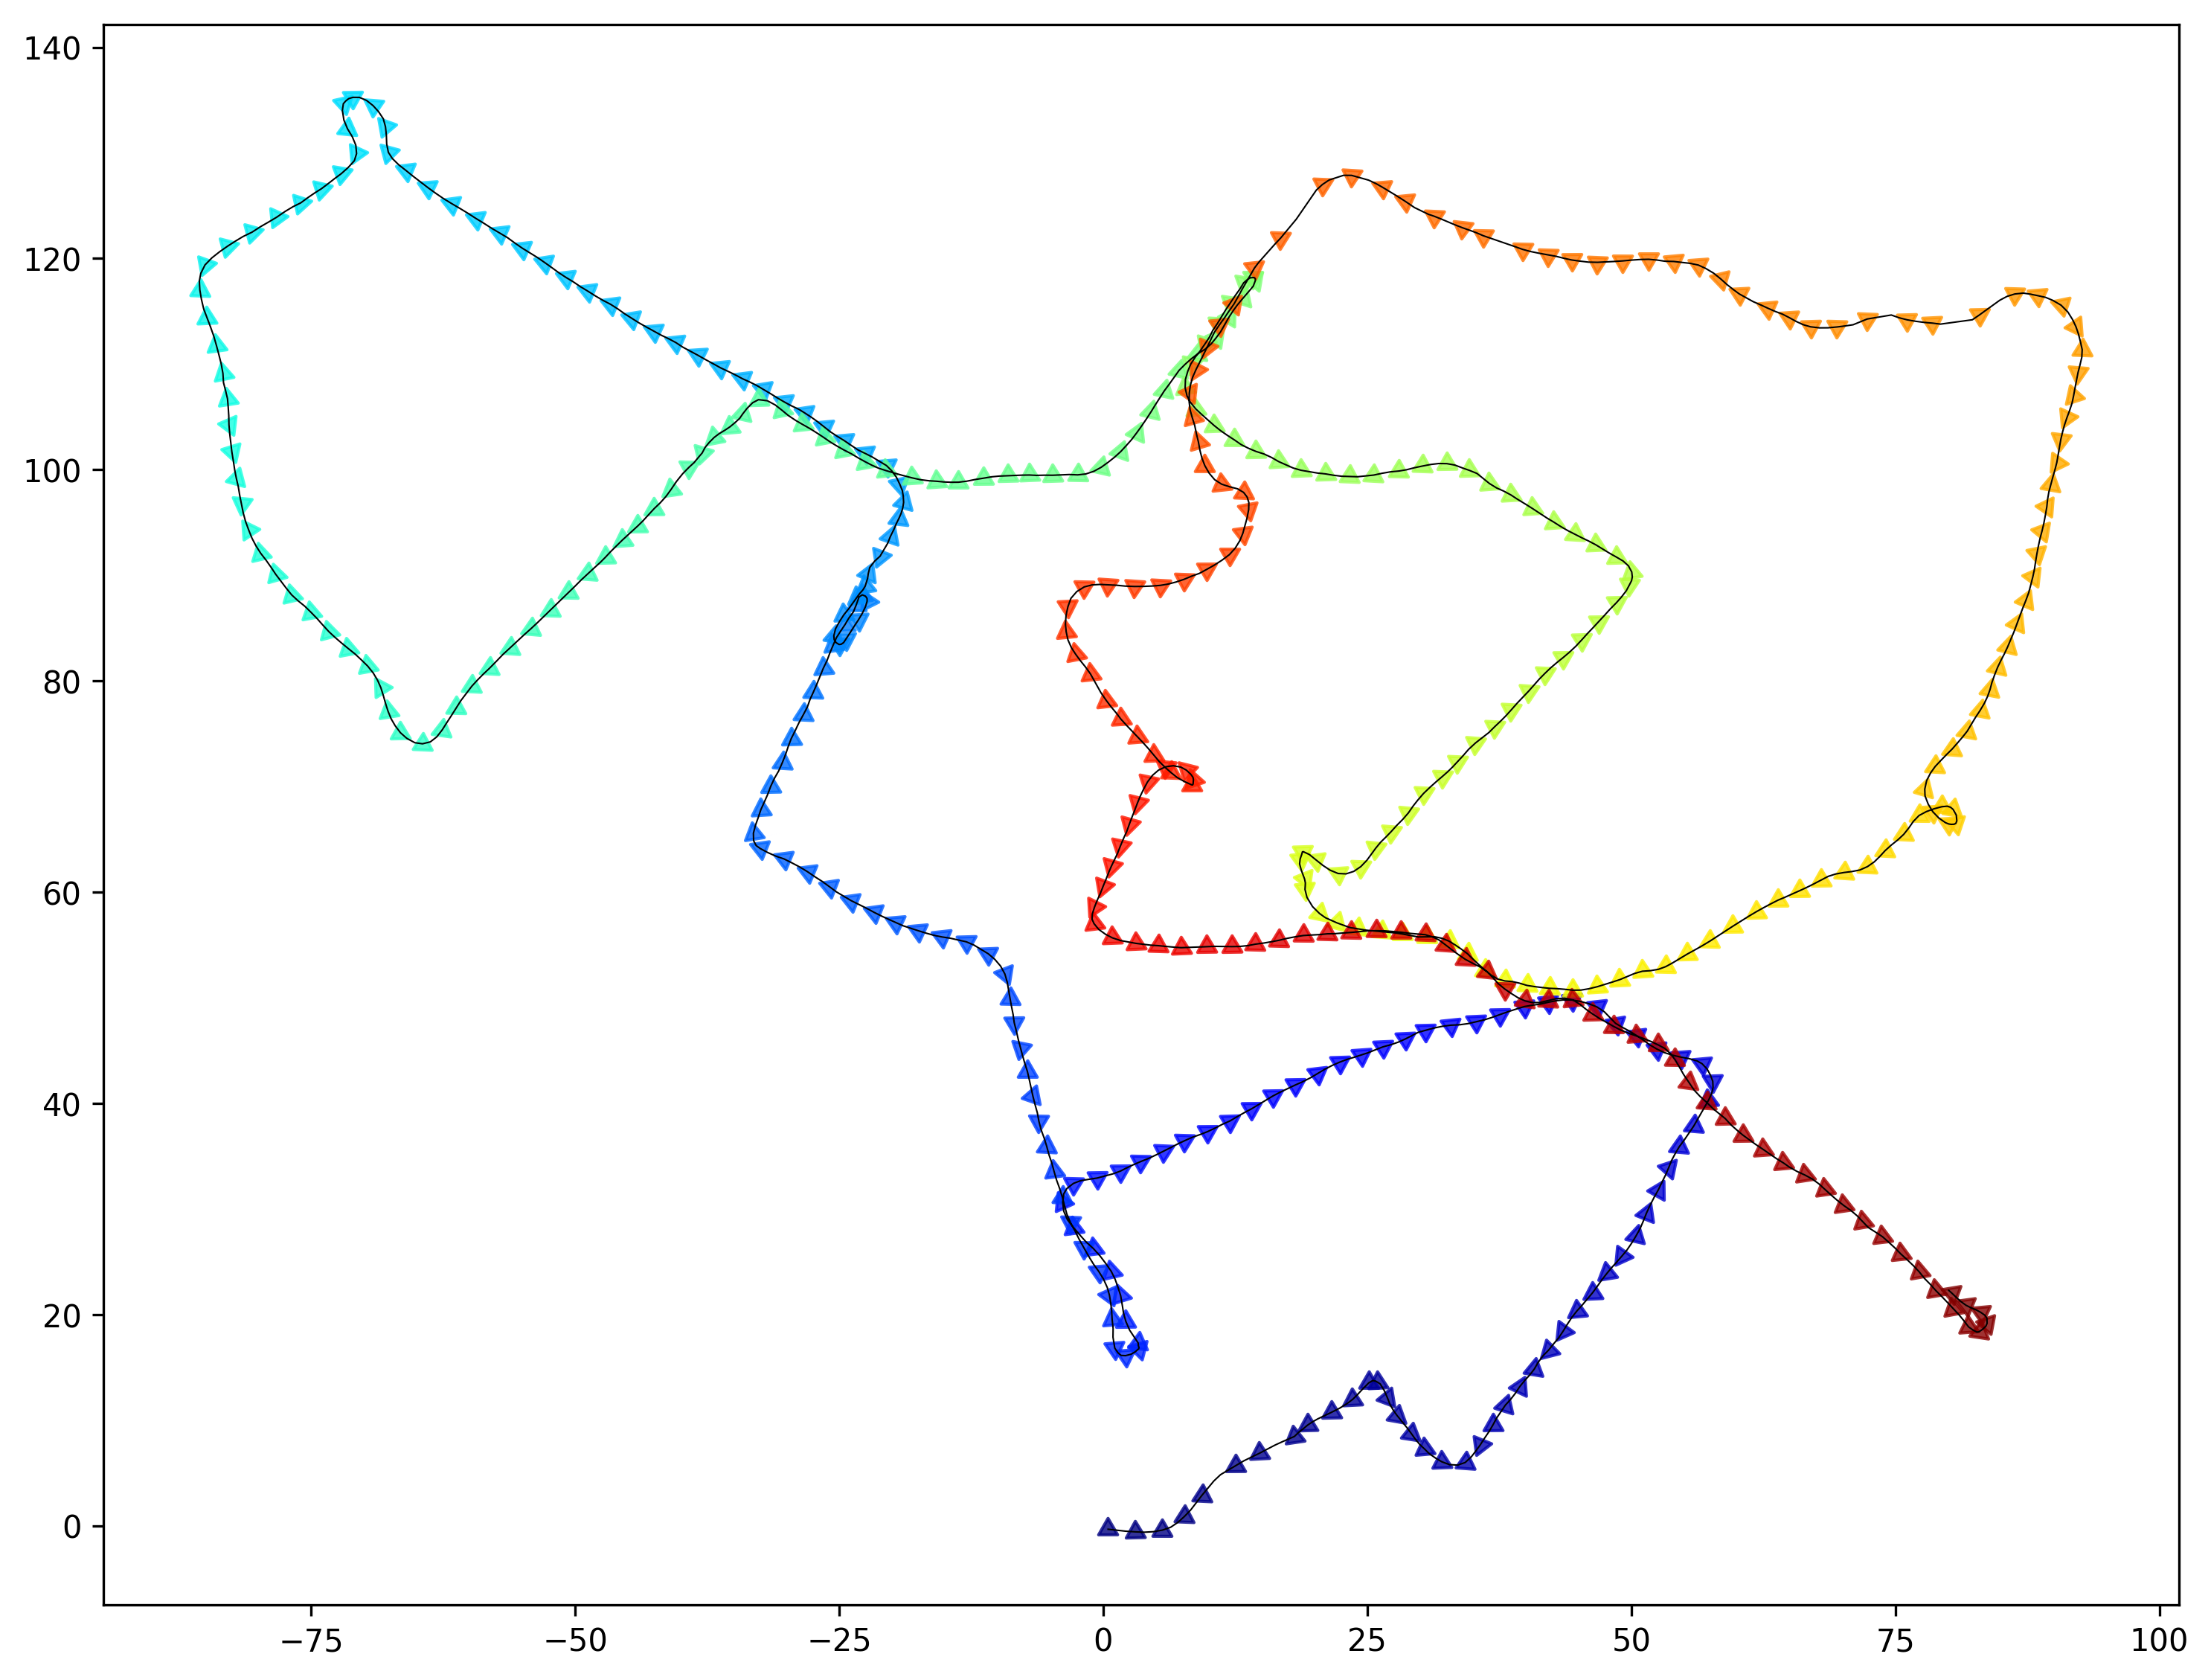